# Module 02: CarbonModel-Assignment

## Due: 2021-09-21

## Name: Brian KYANJO

###  Assignment Tasks

For all plots, label all axes and provide units.

__Problem A: Modify and rerun the model__

1. Modify the model so that the photosynthesis flux includes the mass of carbon in the land (i.e., $M_2$). Use the following parameters:

  * $M_1^0$ = 1100.0 
  * $M_2^0$ = 300.0 
  * $k_{12}$ = 0.0003 
  * $k_{21}$ = 0.1  


In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#variables to be used
M1i = 1100.0 #mass of carbon in the atmosphere
M2i = 300.0  #mass of carbon in the land

k12 = 0.0003  #flux from atmosphere to land per unit mass
k21 = 0.1    #flux from land to atmosphere per unit mass

ti = 0.0     #intial time
tf = 20.0    #final time
dt = 0.05       #time step


In [3]:
def CModel(ti,tf,dt,k12,k21,M1i,M2i):
    t = np.arange(ti,tf+dt,dt) #an array of temporal points

    Nt = t.size #size of t
    
    M1 = np.zeros((Nt,)) #continer for carbon mass in atmosphere
    M2 = np.zeros((Nt,)) #continer for carbon mass in land
    #time loop
    for i in np.arange(Nt):
        if (i==0): #at t=0

            M1[i] = M1i #initial atmospheric carbon mass
            M2[i] = M2i #initial land carbon mass

        else:
            dM1dt = k21*M2[i-1] - k12*M1[i-1]*M2[i-1] #change in C mass into the atmosphere w.r.t time
            dM2dt = k12*M1[i-1]*M2[i-1] - k21*M2[i-1] #change in C mass into the land w.r.t time

            #Mass update
            M1[i] = M1[i-1] + dM1dt*dt
            M2[i] = M2[i-1] + dM2dt*dt
            
    return t,M1,M2

In [4]:
t,M1,M2 = CModel(ti,tf,dt,k12,k21,M1i,M2i) #call function Cmodel

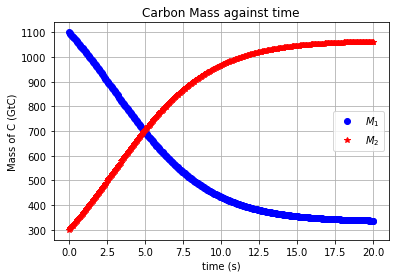

In [5]:
#plt.figure(figsize=(7.5,6))
#plt.rcParams.update({'font.size': 16})

#plt.subplot(2,1,1)
plt.plot(t,M1,'bo', label='$M_{1}$')
plt.plot(t,M2,'r*', label='$M_{2}$')
plt.ylabel('Mass of C (GtC)')
plt.xlabel('time (s)')
plt.title('Carbon Mass against time')
plt.legend()
plt.grid()
plt.show()

2. Repeat the "unforced" (i.e., no anthropogenic emissions) simulation above, but run the model for `t = 100` years with a daily time step (i.e., `dt = 1/365`)

In [6]:
dt = 1/365 
tf = 100
t,M1,M2 = CModel(ti,tf,dt,k12,k21,M1i,M2i) #call function Cmodel

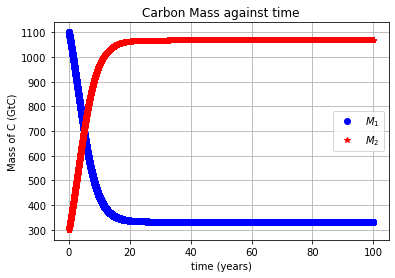

In [7]:
#plt.figure(figsize=(7.5,6))
#plt.rcParams.update({'font.size': 16})

#plt.subplot(2,1,1)
plt.plot(t,M1,'bo', label='$M_{1}$')
plt.plot(t,M2,'r*', label='$M_{2}$')
plt.ylabel('Mass of C (GtC)')
plt.xlabel('time (years)')
plt.title('Carbon Mass against time')
plt.legend()
plt.grid()
plt.show()

3. Use the `print()` command to print out the value of $M_1$ and $M_2$ at the end of the simulation


In [8]:
print('M1 = ',M1[len(M1)-1],'GtC','\n\n M2 = ',M2[len(M2)-1],'GtC')

M1 =  333.3333333333658 GtC 

 M2 =  1066.6666666665792 GtC


__Problem B: Examine impacts of human emissions__

1. Load the anthropogenic emissions data for 1751-2008 (see numpy `np.loadtxt()` command usage [here](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)). Note that the data is in a comma separated variable file (named `AnthropogenicEmissions.1751_2008.csv`) with one header row.

In [9]:
historical_emissions_file = 'AnthropogenicEmissions.1751_2008.csv'
data = np.loadtxt(historical_emissions_file, delimiter=',', skiprows=1)

#extract the two columns from the historical dataset.
year = data[:,0]
cflux = data[:,1]

2. Plot the anthropogenic emissions data

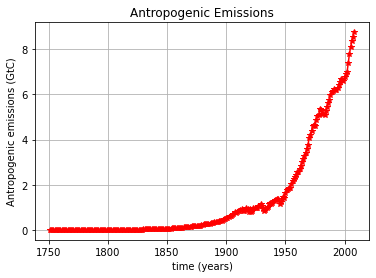

In [10]:
#plt.figure(figsize=(7.5,6))
#plt.rcParams.update({'font.size': 16})

plt.plot(year,cflux,'r*-')

plt.ylabel('Antropogenic emissions (GtC)')
plt.xlabel('time (years)')
plt.title('Antropogenic Emissions')
plt.grid()
plt.show()


3. Starting from the initial conditions ($M_1^0$ and $M_2^0$) corresponding to the final conditions noted in part __A(3)__ above, simulate the response of the carbon system to the anthropogenic emissions from 1751 to 2008 by adding an appropriate source term in the system of equations. Create the following plots:

  * Mass of C in the atmosphere versus time 
  * Mass of C in the land versus time 
  * The change in mass of C in the atmosphere vs time 
  * The change in mass of C in the biosphere vs time 

In [11]:
def CModela(ti,tf,dt,k12,k21,M1i,M2i,fa):
    t = np.arange(ti,tf+dt,dt) #an array of temporal points

    Nt = t.size #size of t
    
    M1 = np.zeros((Nt,)) #continer for carbon mass in atmosphere
    M2 = np.zeros((Nt,)) #continer for carbon mass in land
    #time loop
    for i in np.arange(Nt):
        if (i==0): #at t=0

            M1[i] = M1i #initial atmospheric carbon mass
            M2[i] = M2i #initial land carbon mass

        else:
            dM1dt = k21*M2[i-1] - k12*M1[i-1]*M2[i-1] + fa[i] #change in C mass into the atmosphere w.r.t time
            dM2dt = k12*M1[i-1]*M2[i-1] - k21*M2[i-1]         #change in C mass into the land w.r.t time

            #Mass update
            M1[i] = M1[i-1] + dM1dt*dt
            M2[i] = M2[i-1] + dM2dt*dt
            
    return t,M1,M2

In [12]:
cflux_t = np.interp(t, year, cflux) #interpolate year and cflux values

t,M1,M2 = CModela(ti,tf,dt,k12,k21,M1i,M2i,cflux_t)

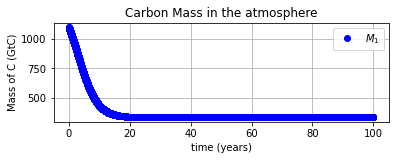

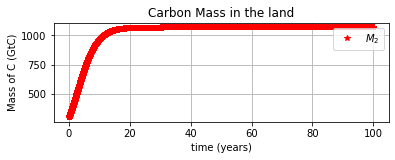

In [13]:
#plt.figure(figsize=(7.5,7))
#plt.rcParams.update({'font.size': 16})

plt.subplot(2,1,1)
plt.plot(t,M1,'bo', label='$M_{1}$')
plt.ylabel('Mass of C (GtC)')
plt.xlabel('time (years)')
plt.title('Carbon Mass in the atmosphere')
plt.legend()
plt.grid()
plt.show()

plt.subplot(2,1,2)
plt.plot(t,M2,'r*', label='$M_{2}$')
plt.ylabel('Mass of C (GtC)')
plt.xlabel('time (years)')
plt.title('Carbon Mass in the land')
plt.legend()
plt.grid()



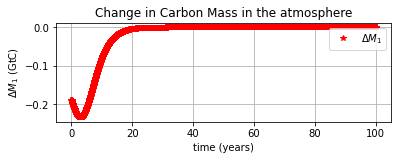

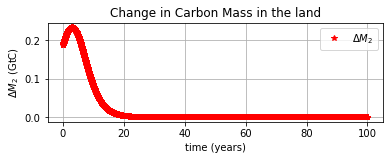

In [14]:
plt.subplot(2,1,1)
plt.plot(t[1:],np.diff(M1),'r*', label='$\Delta M_{1}$')
plt.ylabel('$\Delta M_{1}$ (GtC)')
plt.xlabel('time (years)')
plt.title('Change in Carbon Mass in the atmosphere')
plt.legend()
plt.grid()
plt.show()

plt.subplot(2,1,2)
plt.plot(t[1:],np.diff(M2),'r*', label='$\Delta M_{2}$')
plt.ylabel('$\Delta M_{2}$ (GtC)')
plt.xlabel('time (years)')
plt.title('Change in Carbon Mass in the land')
plt.legend()
plt.grid()

4. Use the `print()` command to print out the value of $M_1$ and $M_2$ at the end of the simulation in 2008.

In [15]:
print('M1 = ',M1[len(M1)-1],'GtC','\n\n M2 = ',M2[len(M2)-1],'GtC')

M1 =  333.3427058620549 GtC 

 M2 =  1066.957294137884 GtC


Human emissions increased both the mass of carbon in land and the atmosphere.

__Problem C: Examine the effects of mitigation__

1. Load the alternative emission scenarios contained in the file `.csv`, which represent three pathways to net zero emissions: (a) net zero emissions by the year 2030 (column 2), (c) net zero emissions by 2050 (column 3), and zero emissions growth (i.e., constant emissions) starting in 2008 (column 4).

In [16]:
future_emissions_file = 'EmissionsMitigationScenarios.2008_2100.csv'
data = np.loadtxt(future_emissions_file, delimiter=',', skiprows=1)

#extract the four columns from the historical dataset.
year = data[:,0]    #years
cflux_nz2030 = data[:,1] #Net zero emissions by the year 2030
cflux_nz2050 = data[:,2] #Net zero emissions by the year 2050
cflux_zeg = data[:,3]     #zero emission growth

2. Starting from the initial conditions ($M_1^0$ and $M_2^0$) corresponding to the final conditions noted in part __B(4)__ above, run the model three times, one for each scenario. Create the following plots: 

  * Mass of C in the atmosphere versus time (all three scenarios on one plot)
  * Mass of C in the land versus time (all three scenarios on one plot)
  * The change in mass of C in the atmosphere vs time 
  * The change in mass of C in the biosphere vs time 


In [17]:
cflux_t1 = np.interp(t, year, cflux_nz2030) #interpolate year and cflux values
cflux_t2 = np.interp(t, year, cflux_nz2050)
cflux_t3 = np.interp(t, year, cflux_zeg)

#call the function
t1,M11,M21 = CModela(ti,tf,dt,k12,k21,M1i,M2i,cflux_t1)
t2,M12,M22 = CModela(ti,tf,dt,k12,k21,M1i,M2i,cflux_t2)
t3,M13,M23 = CModela(ti,tf,dt,k12,k21,M1i,M2i,cflux_t3)

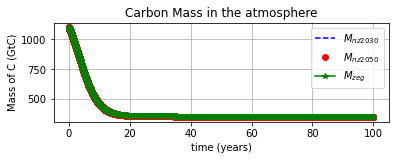

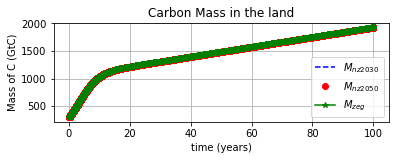

In [18]:
plt.subplot(2,1,1)
plt.plot(t1,M11,'b--', label='$M_{nz2030}$')
plt.plot(t2,M12,'ro', label='$M_{nz2050}$')
plt.plot(t3,M13,'g*-', label='$M_{zeg}$')
plt.ylabel('Mass of C (GtC)')
plt.xlabel('time (years)')
plt.title('Carbon Mass in the atmosphere')
plt.legend()
plt.grid()
plt.show()

plt.subplot(2,1,2)
plt.plot(t1,M21,'b--', label='$M_{nz2030}$')
plt.plot(t2,M22,'ro', label='$M_{nz2050}$')
plt.plot(t3,M23,'g*-', label='$M_{zeg}$')
plt.ylabel('Mass of C (GtC)')
plt.xlabel('time (years)')
plt.title('Carbon Mass in the land')
plt.legend()
plt.grid()


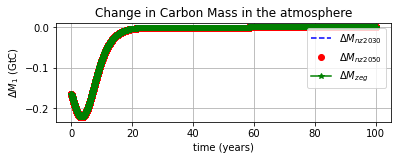

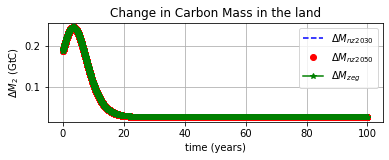

In [19]:
plt.subplot(2,1,1)
plt.plot(t1[1:],np.diff(M11),'b--', label='$\Delta M_{nz2030}$')
plt.plot(t2[1:],np.diff(M12),'ro', label='$\Delta M_{nz2050}$')
plt.plot(t3[1:],np.diff(M13),'g*-', label='$\Delta M_{zeg}$')
plt.ylabel('$\Delta M_{1}$ (GtC)')
plt.xlabel('time (years)')
plt.title('Change in Carbon Mass in the atmosphere')
plt.legend()
plt.grid()
plt.show()

plt.subplot(2,1,2)
plt.plot(t1[1:],np.diff(M21),'b--', label='$\Delta M_{nz2030}$')
plt.plot(t2[1:],np.diff(M22),'ro', label='$\Delta M_{nz2050}$')
plt.plot(t3[1:],np.diff(M23),'g*-', label='$\Delta M_{zeg}$')
plt.ylabel('$\Delta M_{2}$ (GtC)')
plt.xlabel('time (years)')
plt.title('Change in Carbon Mass in the land')
plt.legend()
plt.grid()